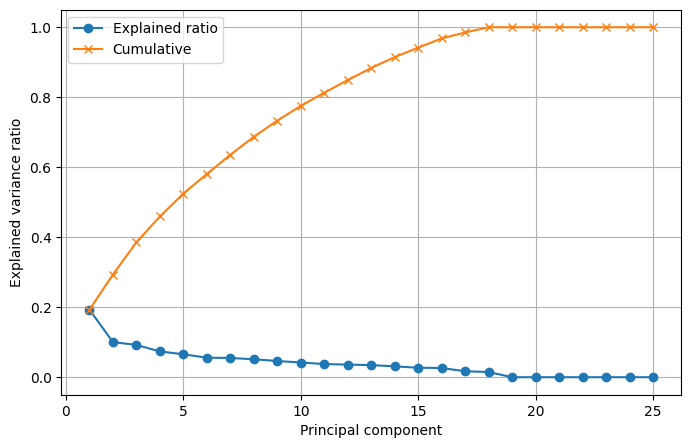

n_components to retain 95% variance: 16


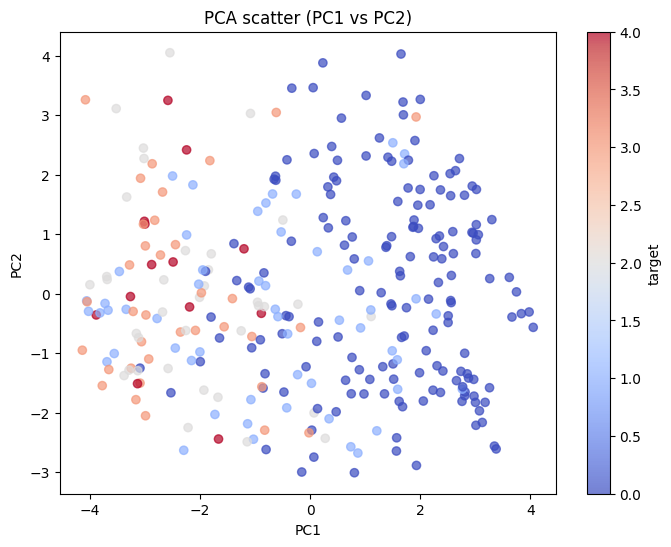

Saved PCA reduced dataset to data/heart_disease_pca.csv


In [3]:
# 02_pca_analysis.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

CLEANED_PATH = "data/processed_cleaned.csv"
df = pd.read_csv(CLEANED_PATH)

X = df.drop(columns=['target']).values
y = df['target'].values

# Ensure features standardized (if not already from preprocessing)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained)+1), explained, marker='o', label='Explained ratio')
plt.plot(range(1, len(explained)+1), cum_explained, marker='x', label='Cumulative')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.legend()
plt.grid()
plt.show()

# Choose n_components based on cumulative variance (e.g., 95%)
n_components = np.argmax(cum_explained >= 0.95) + 1
print("n_components to retain 95% variance:", n_components)

# Scatter plot of first 2 components colored by target
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA scatter (PC1 vs PC2)')
plt.colorbar(label='target')
plt.show()

# Save PCA transformed data
pca_df = pd.DataFrame(X_pca[:, :n_components], columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['target'] = y
pca_df.to_csv("data/heart_disease_pca.csv", index=False)
print("Saved PCA reduced dataset to data/heart_disease_pca.csv")
